In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new dataset as per the user's instructions for step-by-step plotting
new_clean_data_path = 'clean_data_stats50.csv'
# Reload the dataset using the first column as the index
new_clean_data = pd.read_csv(new_clean_data_path, index_col=0)


new_clean_data.fillna('None', inplace=True)

# Display the first few rows of the dataframe to confirm the index is set correctly
new_clean_data




,model,prior,duplicates_level,distortion_level,precision_mean,recall_mean,f1score_mean,precision_std,recall_std,f1score_std
0,Both,Bounded NBD,High,High,0.999016,0.712005,0.831101,0.001474,0.029264,0.019378
1,Both,Bounded NBD,High,Low,1.000000,0.936635,0.967280,0.000000,0.001412,0.000753
2,Both,Bounded NBD,Low,High,1.000000,0.747396,0.855419,0.000000,0.007465,0.004905
3,Both,Bounded NBD,Low,Low,0.979410,0.952381,0.965686,0.009243,0.000000,0.004513
4,Both,Bounded NBD,Medium,High,0.989773,0.738835,0.846087,0.001236,0.002358,0.001474
...,...,...,...,...,...,...,...,...,...,...
91,None,uniform,Low,Low,0.308145,0.952381,0.465566,0.008763,0.000000,0.010012
92,None,uniform,Medium,High,0.983160,0.854552,0.914346,0.004134,0.005203,0.003795
93,None,uniform,Medium,Low,0.999562,0.920741,0.958532,0.001060,0.002470,0.001440
94,None,uniform,Very High,High,0.999919,0.826090,0.904725,0.000444,0.004231,0.002551


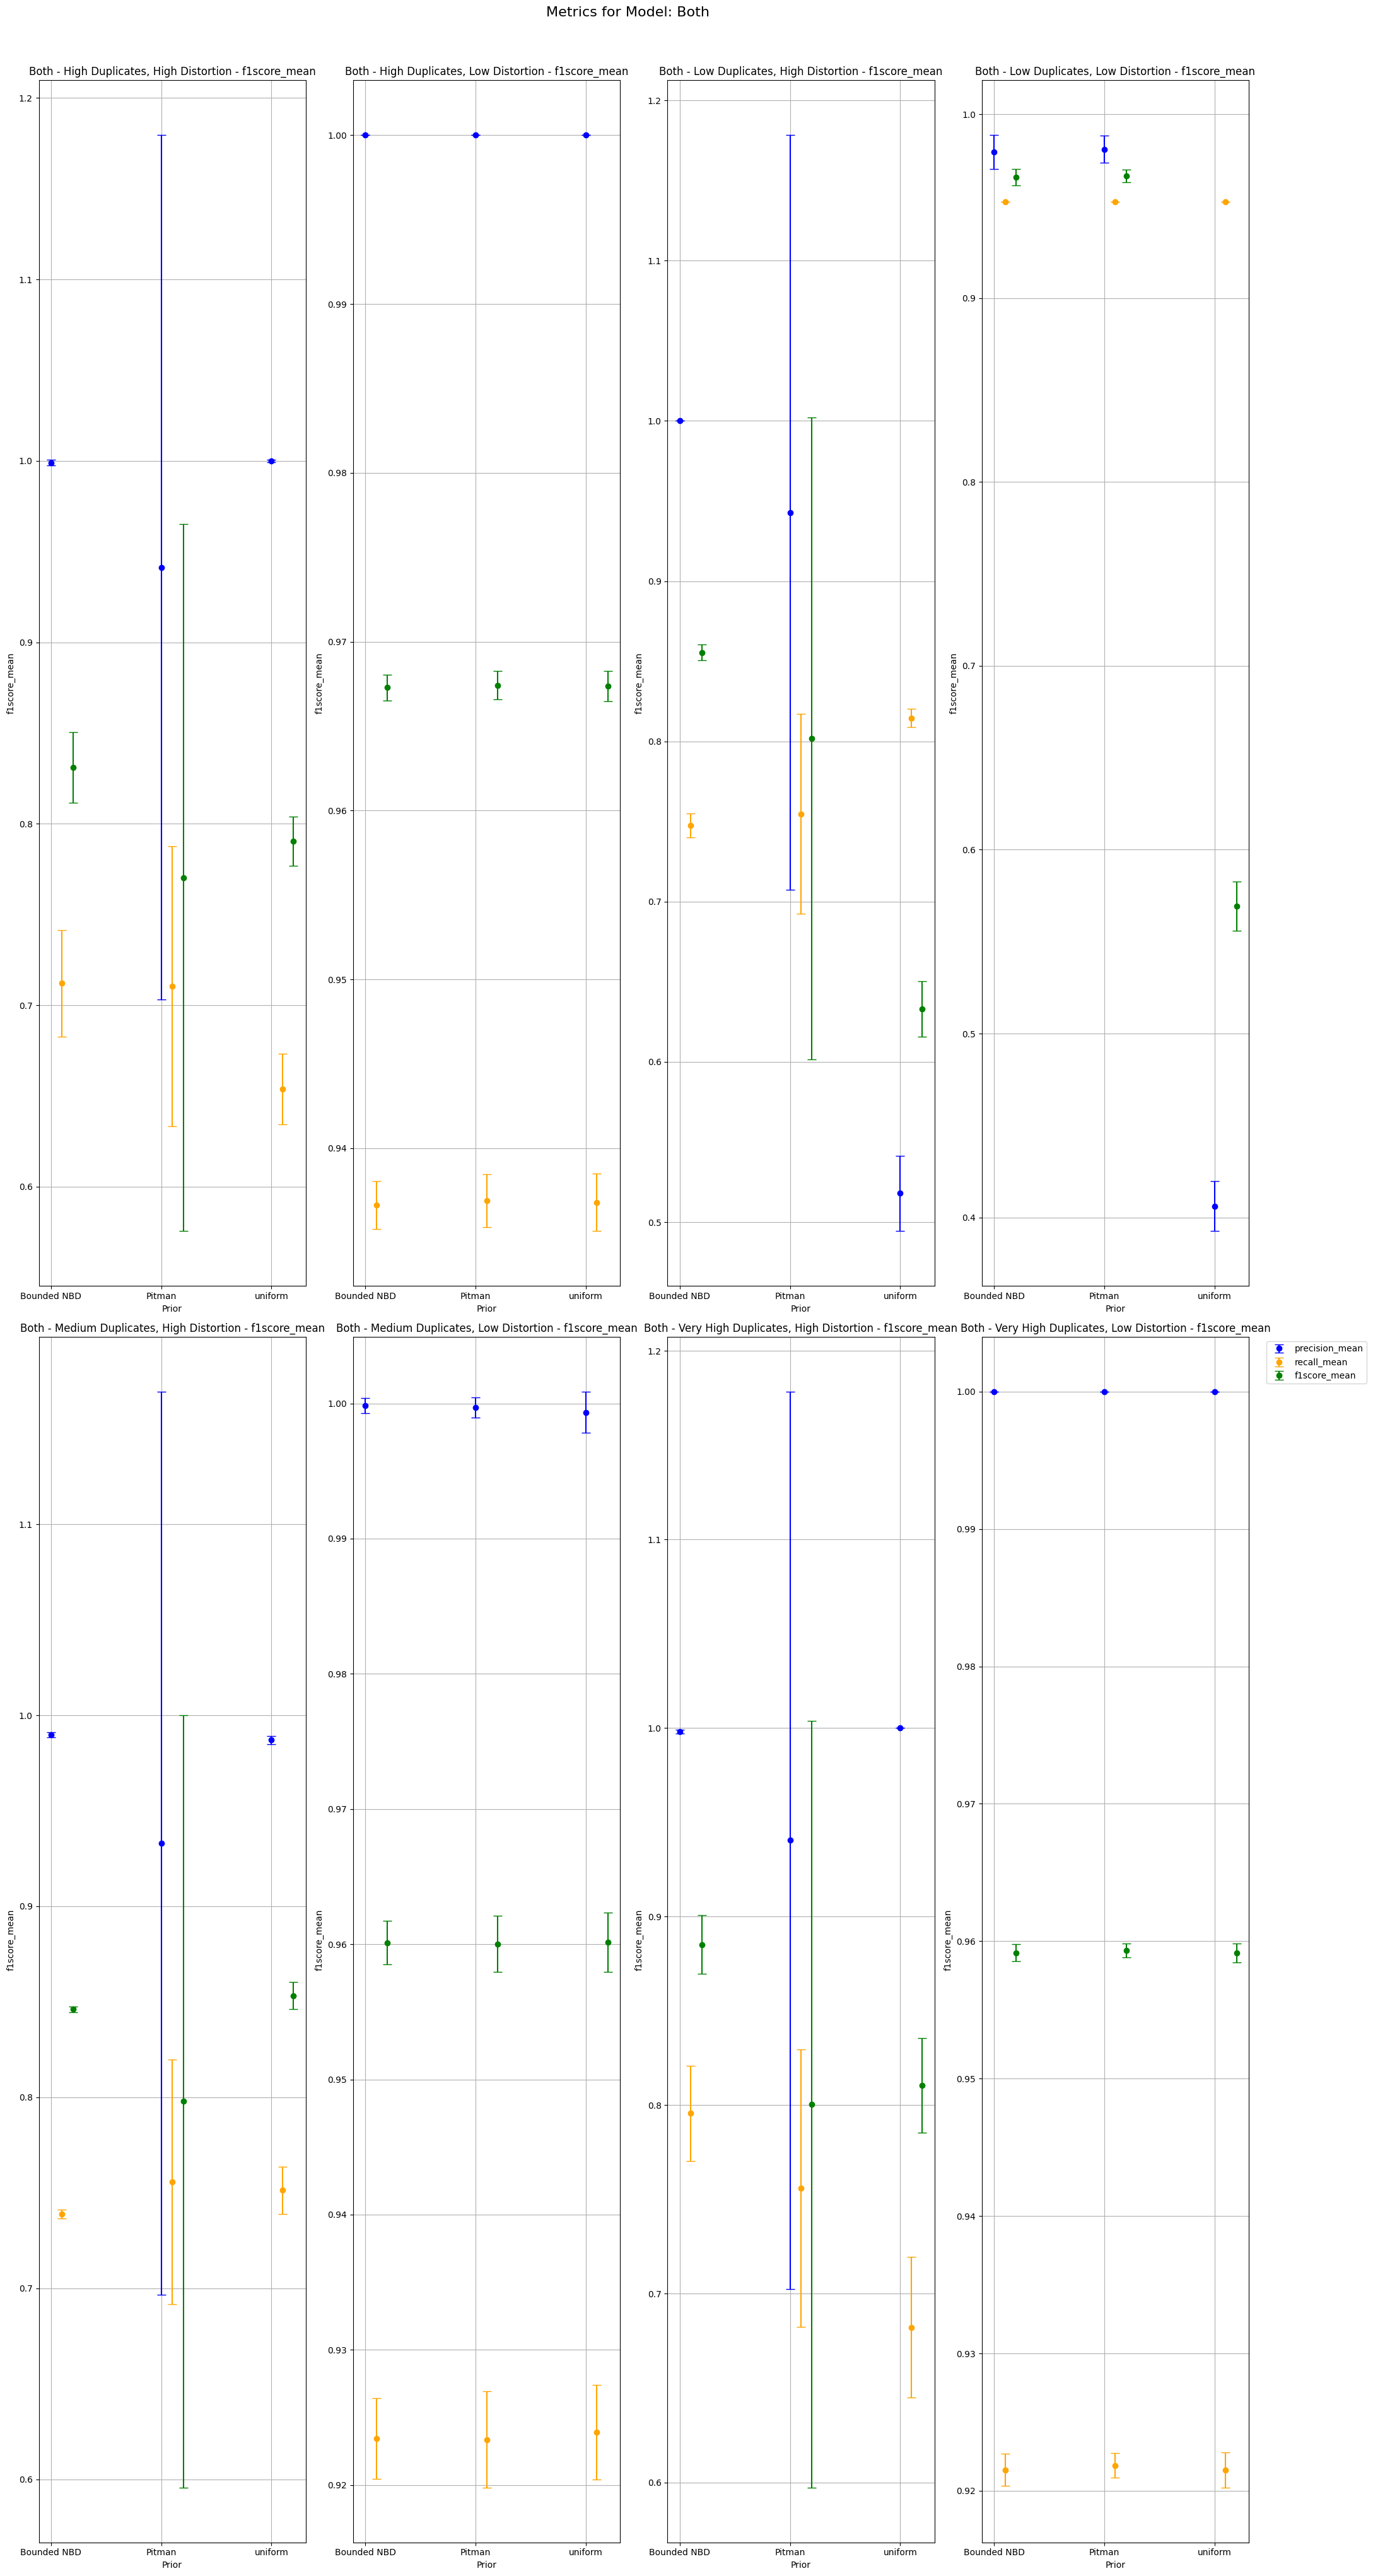

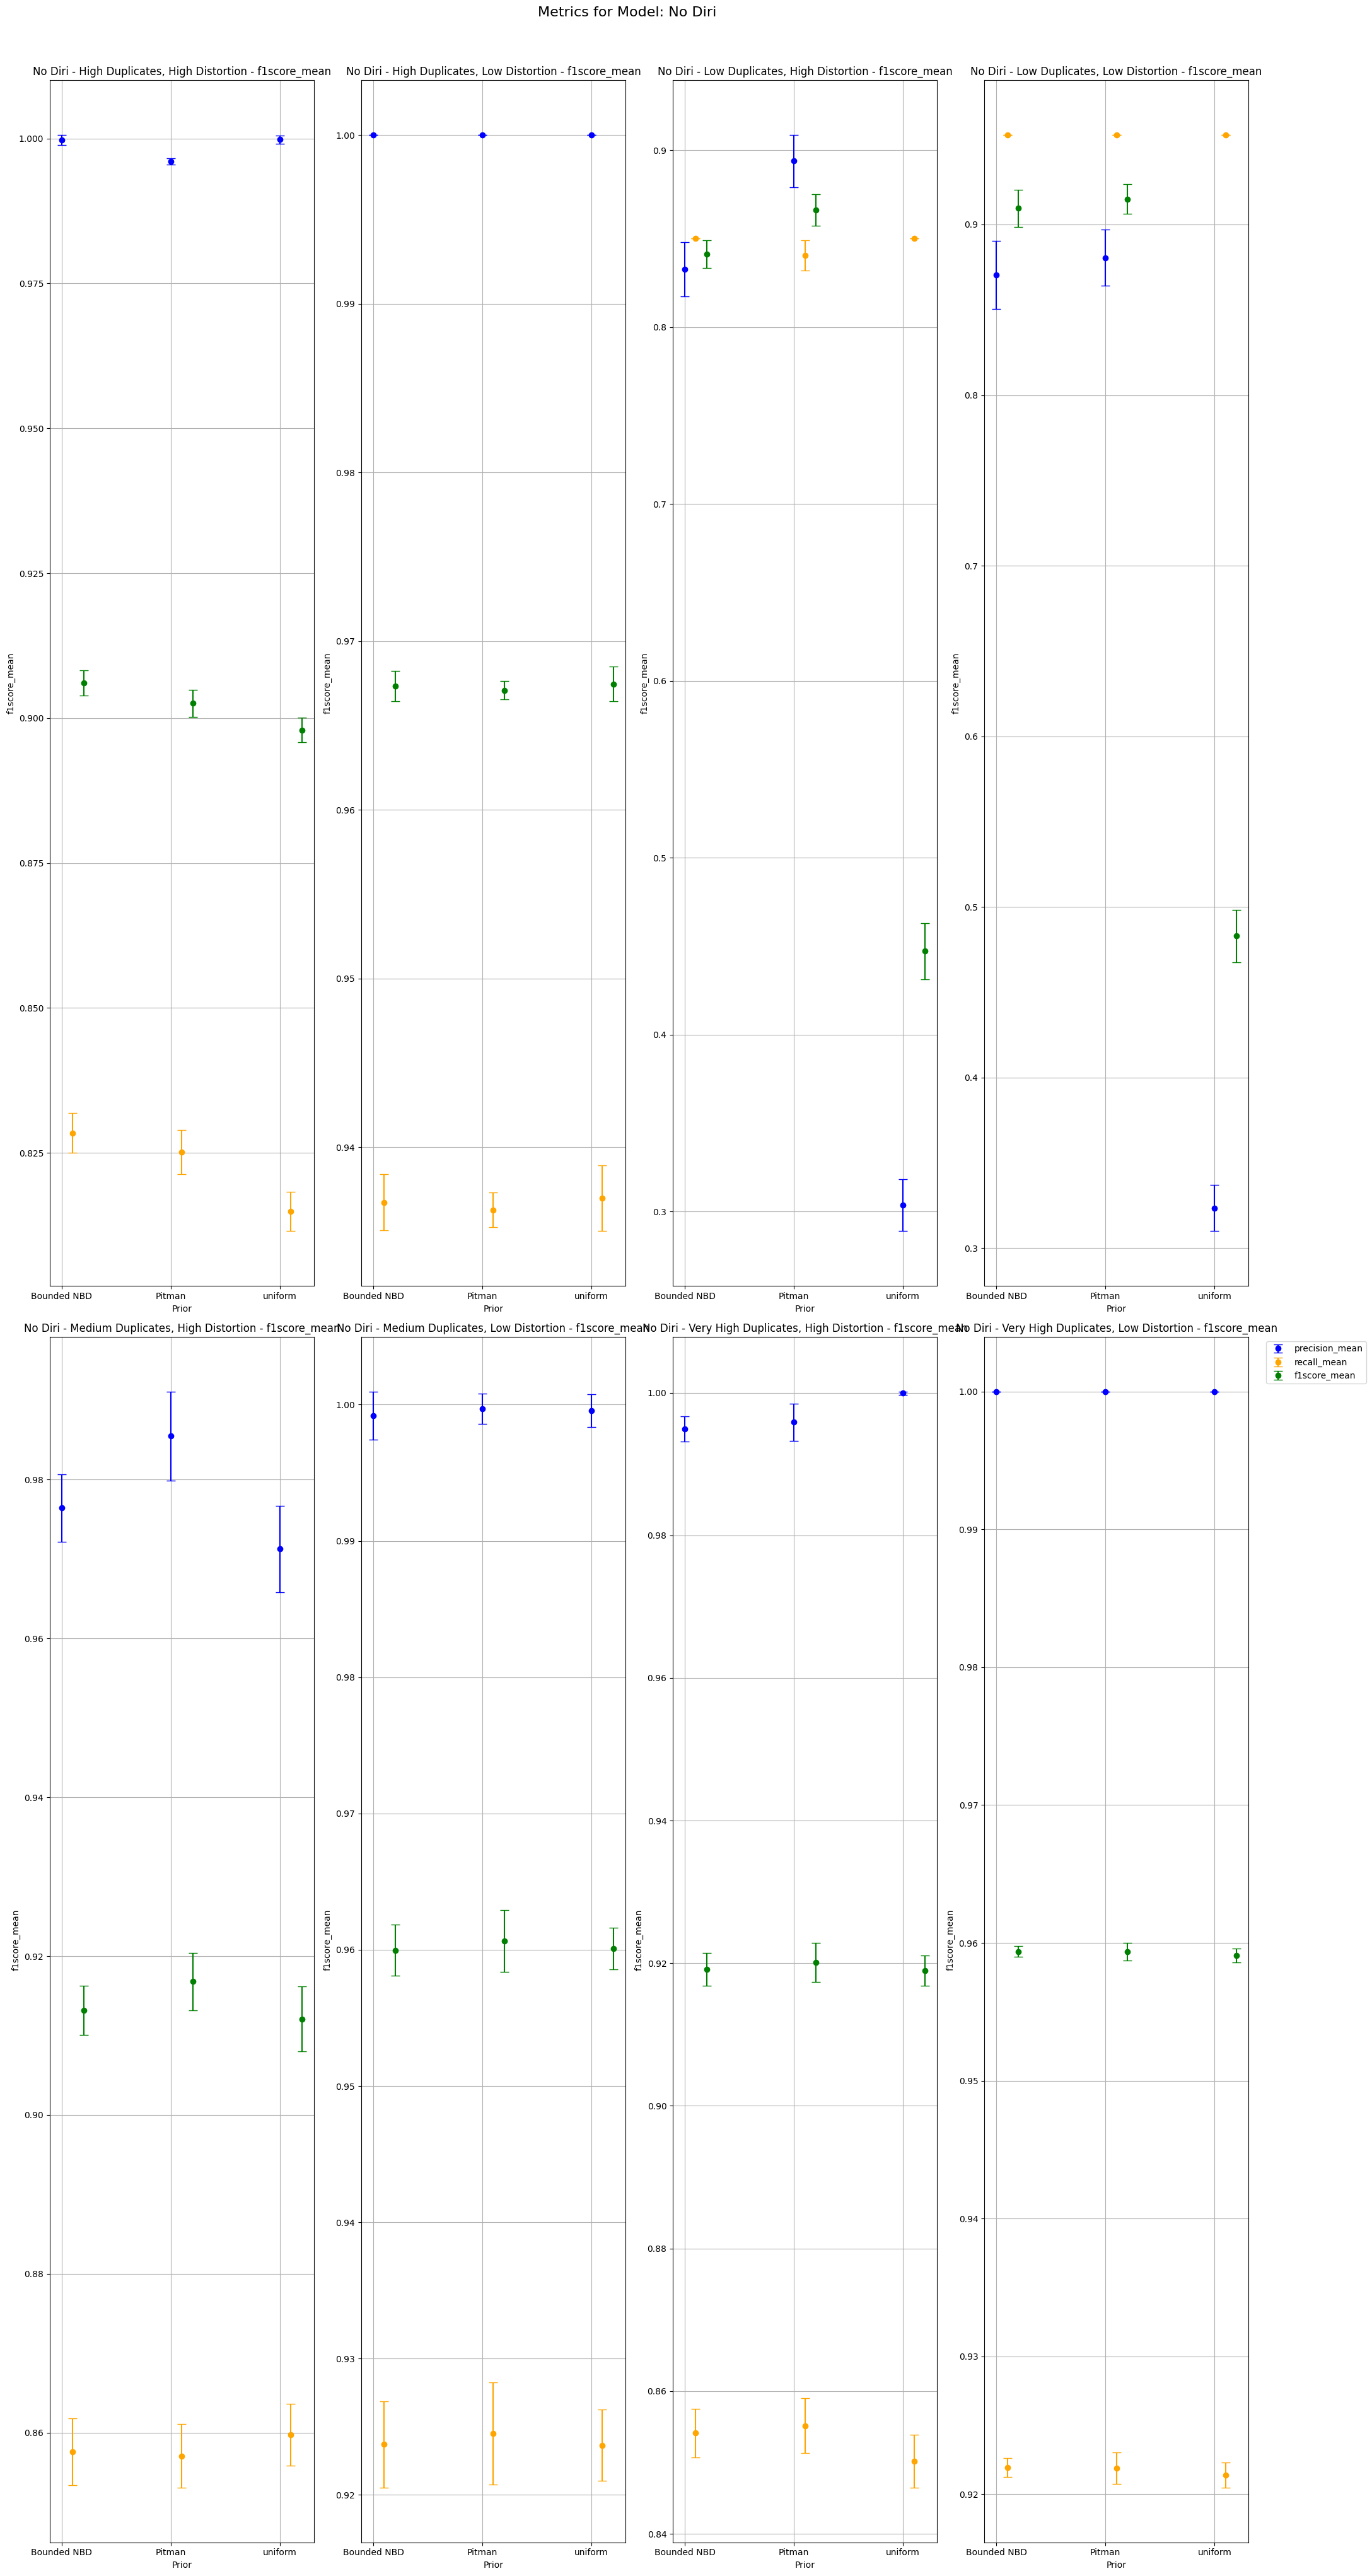

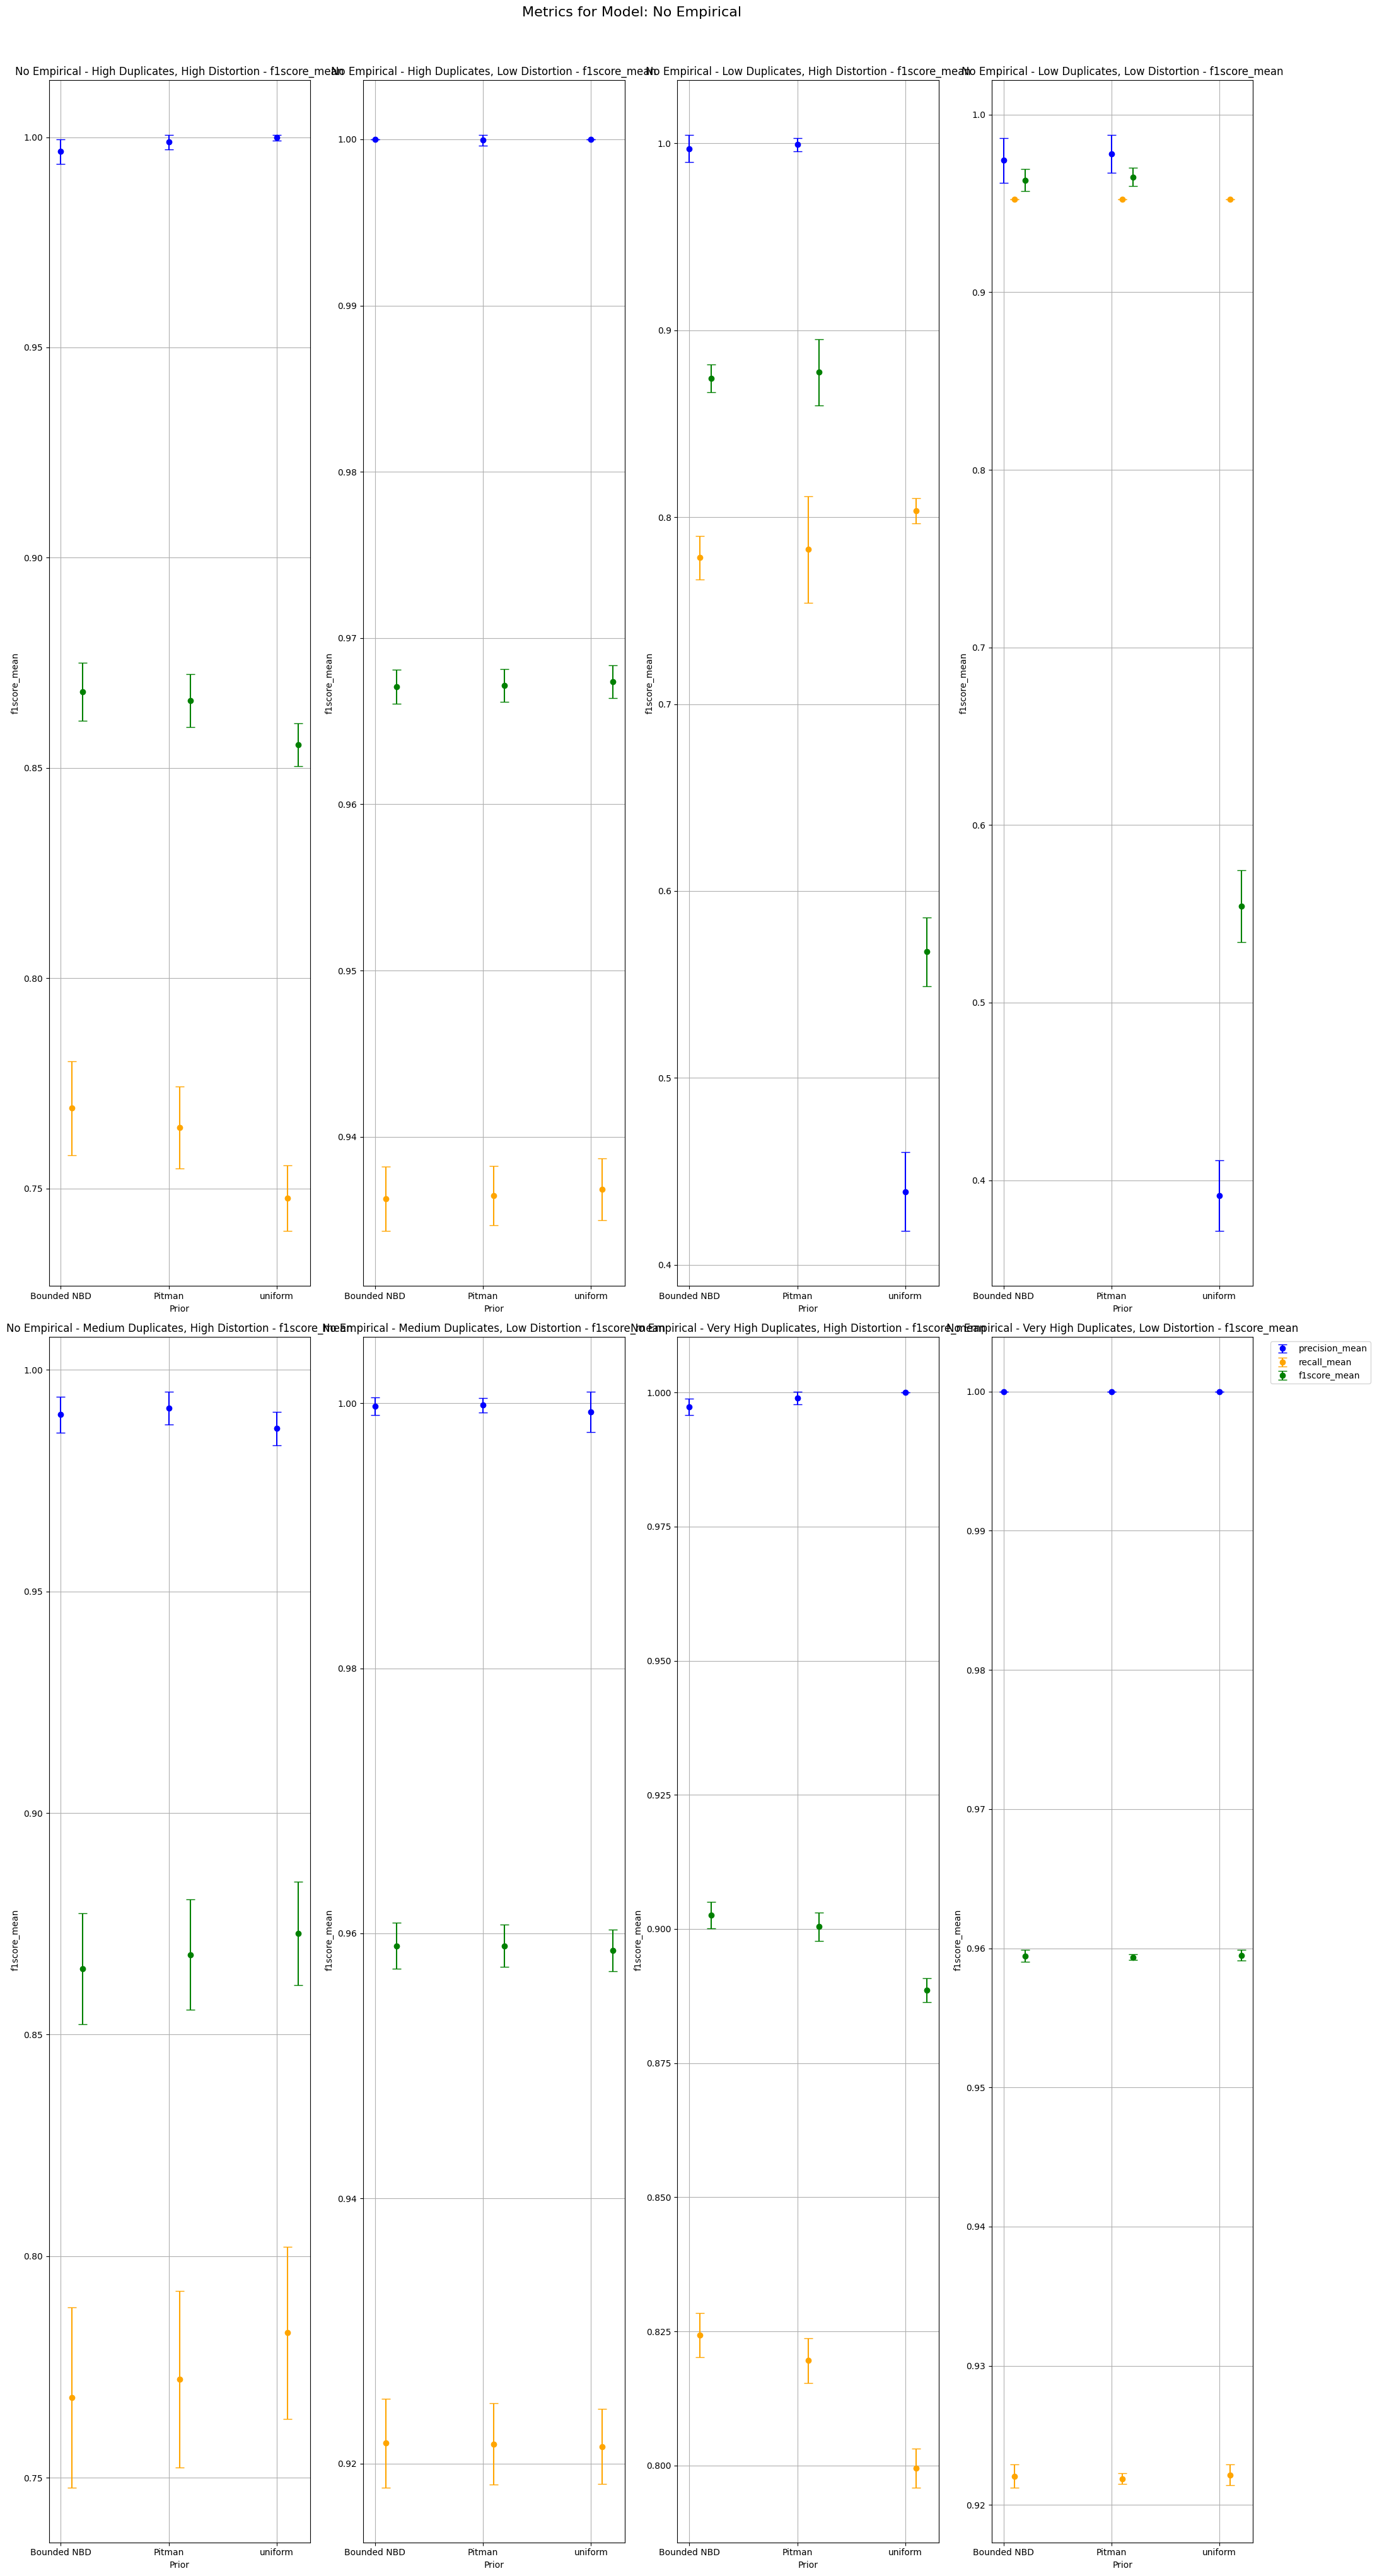

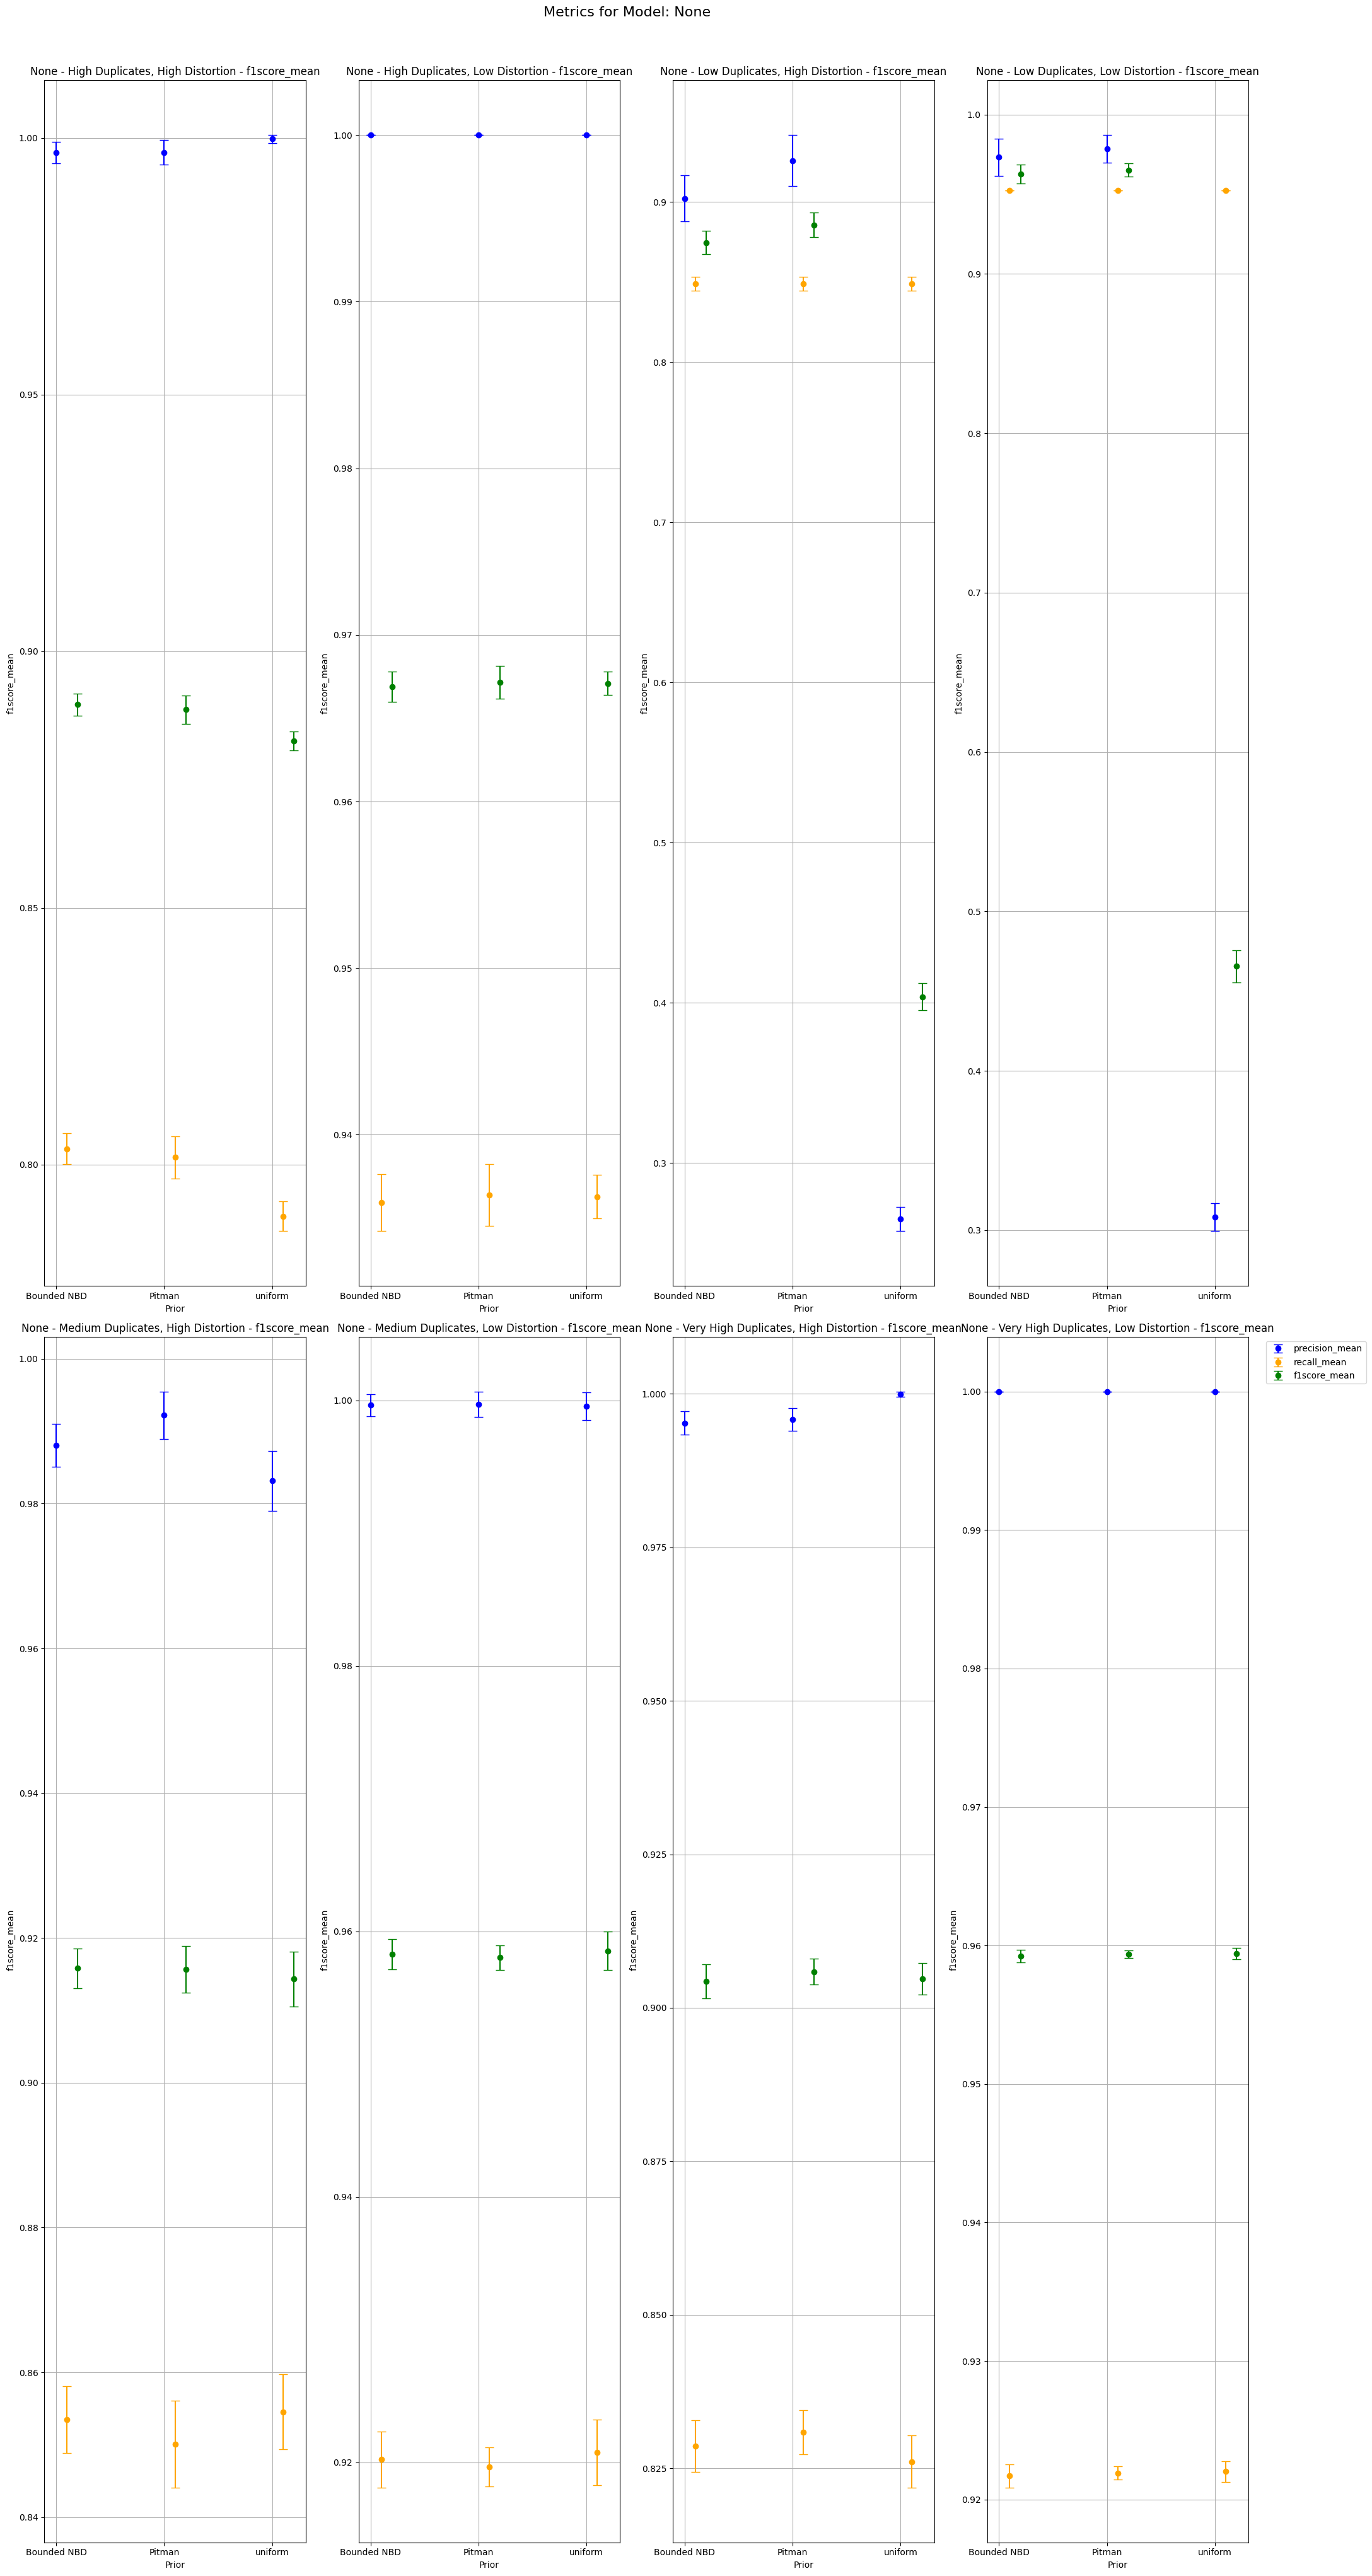

In [26]:
# Load the dataset anew for plotting other models, as we've encountered a reset previously


# Starting with "No Diri" model

df = new_clean_data

for model_to_plot in new_clean_data["model"].unique():
    df_model = df[df['model'] == model_to_plot]

    metrics = ['precision_mean', 'recall_mean', 'f1score_mean']

    filtered_data = new_clean_data[new_clean_data['model'] == 'Both']

    duplicates_levels = filtered_data['duplicates_level'].unique()
    distortion_levels = filtered_data['distortion_level'].unique()

    colors = {0: 'blue', 1: 'orange', 2: 'green'}

    # Generate plots for "No Diri"
    plt.figure(figsize=(20, 20))

    
        
    for j, dup_level in enumerate(duplicates_levels):
        for k, dist_level in enumerate(distortion_levels):
            index = (j * 2 + k)+1
            plt.subplot(2, 4, index)
            
            df_plot = df_model[(df_model['duplicates_level'] == dup_level) & 
                            (df_model['distortion_level'] == dist_level)]
            
            for i, metric in enumerate(metrics):
                std_metric = metric.replace('mean', 'std')
                subset = df_plot
                x_values = [k + 0.1 * i for k in range(len(subset['prior'].unique()))]
                plt.errorbar(x_values, subset[metric], yerr=subset[std_metric], fmt='o', capsize=5, color=colors[i], label=f'{metric}')
                
                plt.xticks(ticks=range(len(df_plot['prior'].unique())), labels=df_plot['prior'].unique())
                plt.title(f'{model_to_plot} - {dup_level} Duplicates, {dist_level} Distortion - {metric}')
                plt.xlabel('Prior')
                plt.ylabel(metric)
                plt.grid(True)

    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.suptitle(f"Metrics for Model: {model_to_plot}", fontsize=16, y=1.02)

    # Save the plot for "No Diri"
    no_diri_plot_path = f"plots/{model_to_plot}_plot.png"
    plt.savefig(no_diri_plot_path, bbox_inches='tight')
    # no_diri_plot_path
